In [2]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')

print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [2]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [3]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [17]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [19]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [47]:
#gender wise level of education
genderwise_education = df.groupby(['gender', 'parental level of education' ])
genderwise_education.size()


gender  parental level of education
female  associate's degree             116
        bachelor's degree               63
        high school                     94
        master's degree                 36
        some college                   118
        some high school                91
male    associate's degree             106
        bachelor's degree               55
        high school                    102
        master's degree                 23
        some college                   108
        some high school                88
dtype: int64

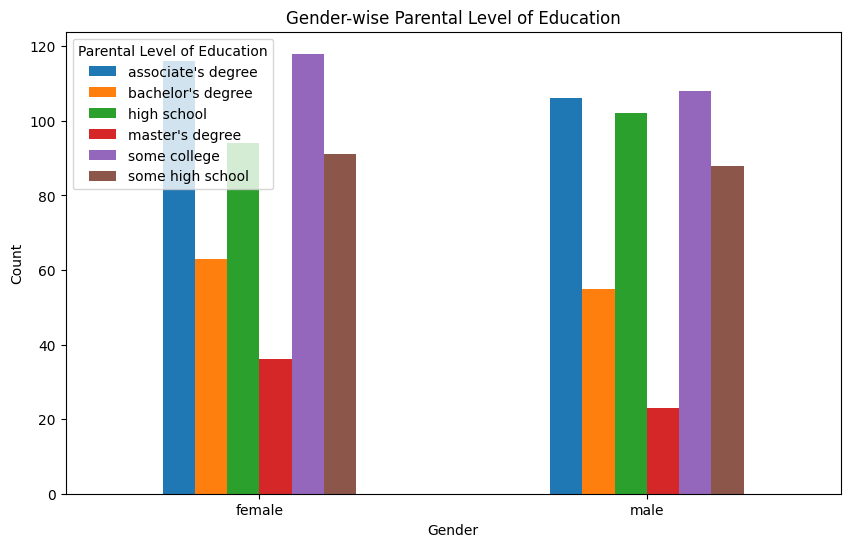

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by gender and parental level of education and count occurrences
genderwise_education = df.groupby(['gender', 'parental level of education']).size().unstack()

# Plot a grouped bar plot
genderwise_education.plot(kind='bar', figsize=(10, 6))

plt.title('Gender-wise Parental Level of Education')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Parental Level of Education')
plt.show()


In [24]:
#to know which gender completed the most preparation course
genderwise_preparation = df.groupby(['gender', 'test preparation course'])
genderwise_preparation.size()

gender  test preparation course
female  completed                  184
        none                       334
male    completed                  174
        none                       308
dtype: int64

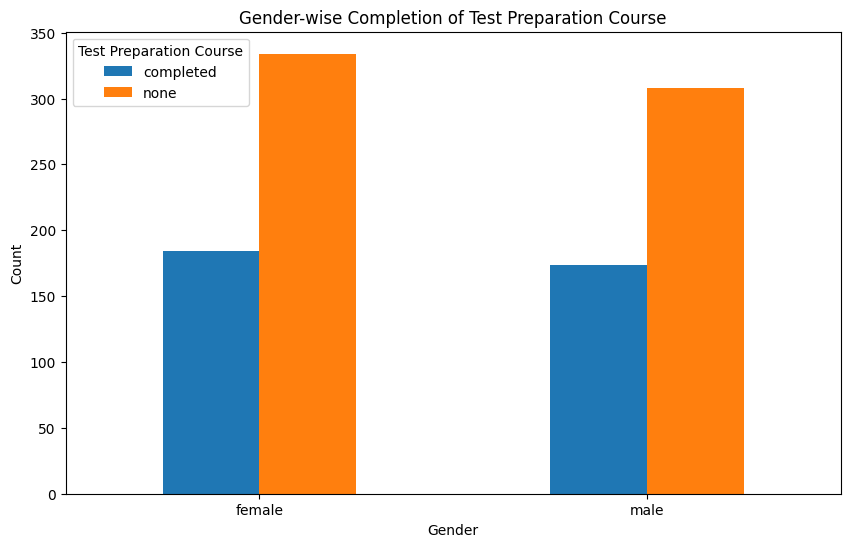

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by gender and test preparation course and count occurrences
genderwise_preparation = df.groupby(['gender', 'test preparation course']).size().unstack()

# Plot a grouped bar plot
genderwise_preparation.plot(kind='bar', figsize=(10, 6))

plt.title('Gender-wise Completion of Test Preparation Course')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Test Preparation Course')
plt.show()


In [25]:
#to know the max min and avg score of each gender on each subject
df.groupby('gender').agg({'math score': ['max', 'min', 'mean'], 'reading score': ['max', 'min', 'mean'], 'writing score': ['max', 'min', 'mean']})

math score                reading score                writing score  \
              max min       mean           max min       mean           max   
gender                                                                        
female        100   0  63.633205           100  17  72.608108           100   
male          100  27  68.728216           100  23  65.473029           100   

                       
       min       mean  
gender                 
female  10  72.467181  
male    15  63.311203

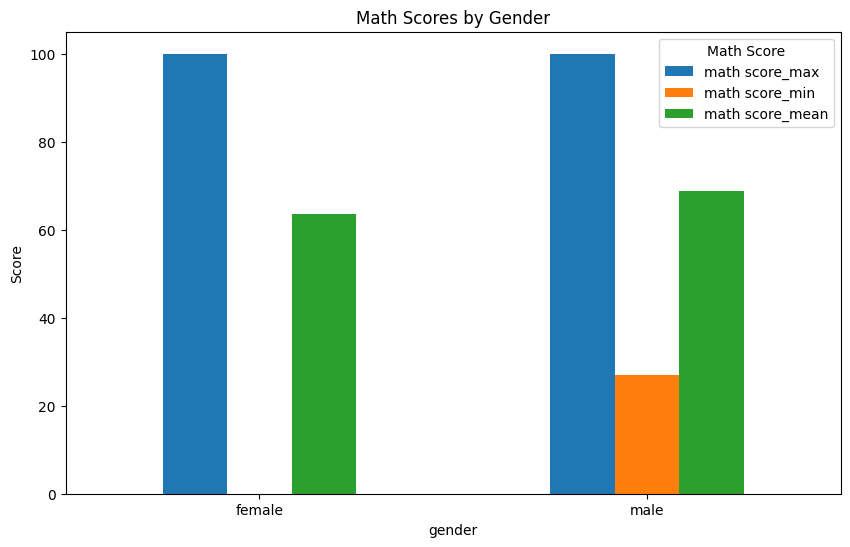

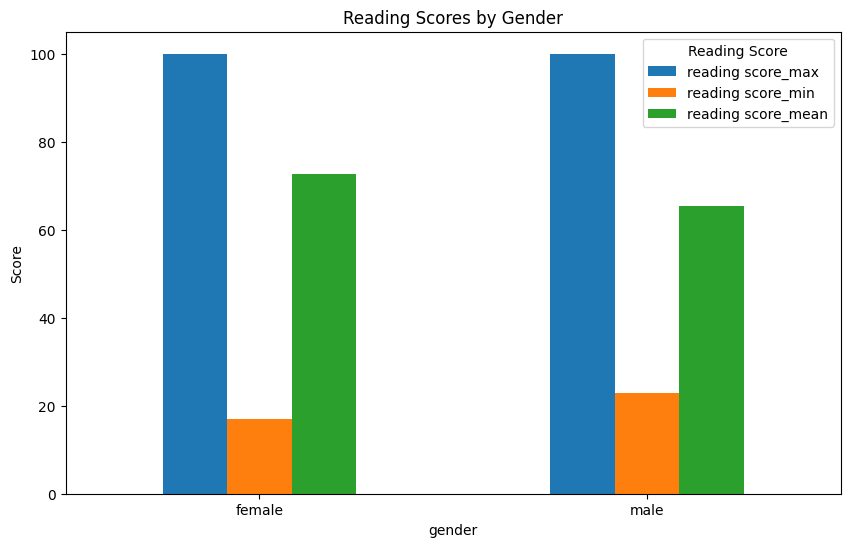

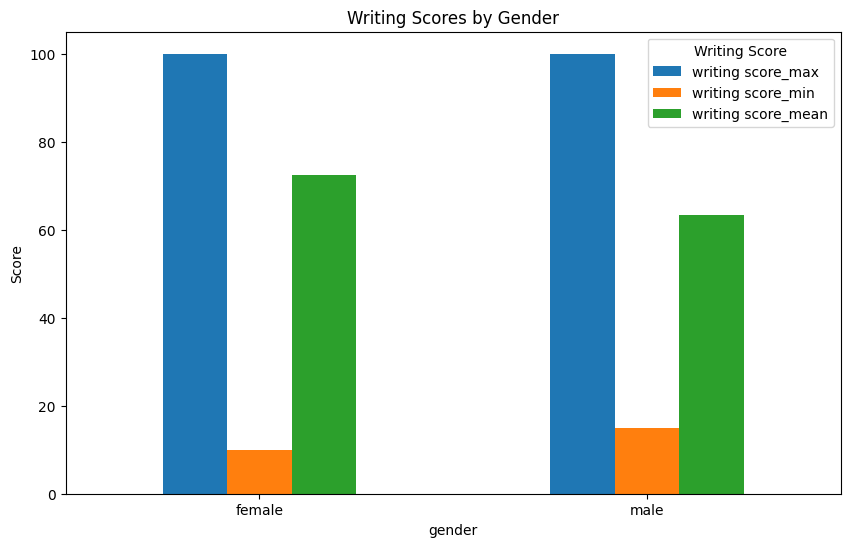

In [36]:
import matplotlib.pyplot as plt

# Group by gender and calculate max, min, and mean for each subject
genderwise_scores = df.groupby('gender').agg({
    'math score': ['max', 'min', 'mean'], 
    'reading score': ['max', 'min', 'mean'], 
    'writing score': ['max', 'min', 'mean']
})

# Flatten column MultiIndex for easy plotting
genderwise_scores.columns = ['_'.join(col).strip() for col in genderwise_scores.columns.values]

# Plot for math score
genderwise_scores[['math score_max', 'math score_min', 'math score_mean']].plot(kind='bar', figsize=(10, 6))
plt.title('Math Scores by Gender')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Math Score')
plt.show()

# Plot for reading score
genderwise_scores[['reading score_max', 'reading score_min', 'reading score_mean']].plot(kind='bar', figsize=(10, 6))
plt.title('Reading Scores by Gender')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Reading Score')
plt.show()

# Plot for writing score
genderwise_scores[['writing score_max', 'writing score_min', 'writing score_mean']].plot(kind='bar', figsize=(10, 6))
plt.title('Writing Scores by Gender')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Writing Score')
plt.show()


In [26]:
#to know people from which race  performed good in overall test

df.groupby('race/ethnicity').agg({'math score': ['max', 'min', 'mean'], 'reading score': ['max', 'min', 'mean'], 'writing score': ['max', 'min', 'mean']})


math score                reading score                 \
                      max min       mean           max min       mean   
race/ethnicity                                                          
group A               100  28  61.629213           100  23  64.674157   
group B                97   8  63.452632            97  24  67.352632   
group C                98   0  64.463950           100  17  69.103448   
group D               100  26  67.362595           100  31  70.030534   
group E               100  30  73.821429           100  26  73.028571   

               writing score                 
                         max min       mean  
race/ethnicity                               
group A                   97  19  62.674157  
group B                   96  15  65.600000  
group C                  100  10  67.827586  
group D                  100  32  70.145038  
group E                  100  22  71.407143

In [27]:
#which level of education performed well in the test

df.groupby('parental level of education').agg({'math score': ['max', 'min', 'mean'], 'reading score': ['max', 'min', 'mean'], 'writing score': ['max', 'min', 'mean']})

math score                reading score      \
                                   max min       mean           max min   
parental level of education                                               
associate's degree                 100  26  67.882883           100  31   
bachelor's degree                  100  29  69.389831           100  41   
high school                         99   8  62.137755            99  24   
master's degree                     95  40  69.745763           100  42   
some college                       100  19  67.128319           100  23   
some high school                    97   0  63.497207           100  17   

                                       writing score                 
                                  mean           max min       mean  
parental level of education                                          
associate's degree           70.927928           100  35  69.896396  
bachelor's degree            73.000000           100  38  73.381356  
high school                  64.704082           100  15  62.448980  
master's degree              75.372881           100  46  75.677966  
some college                 69.460177            99  19  68.840708  
some high school             66.938547           100  10  64.888268

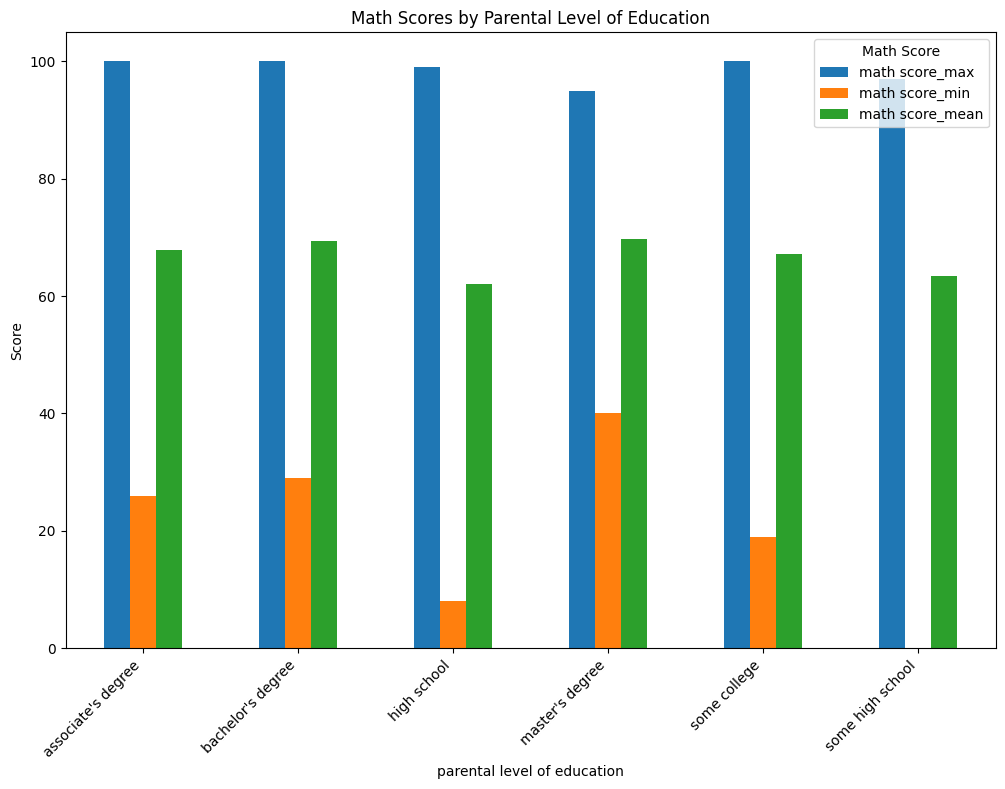

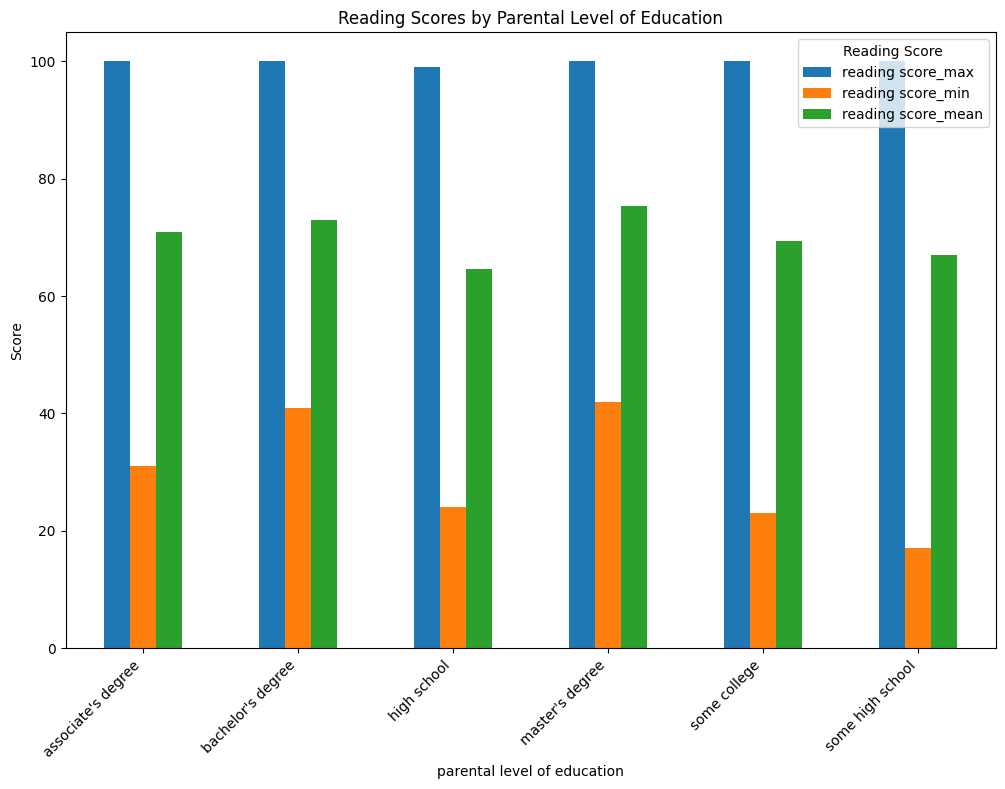

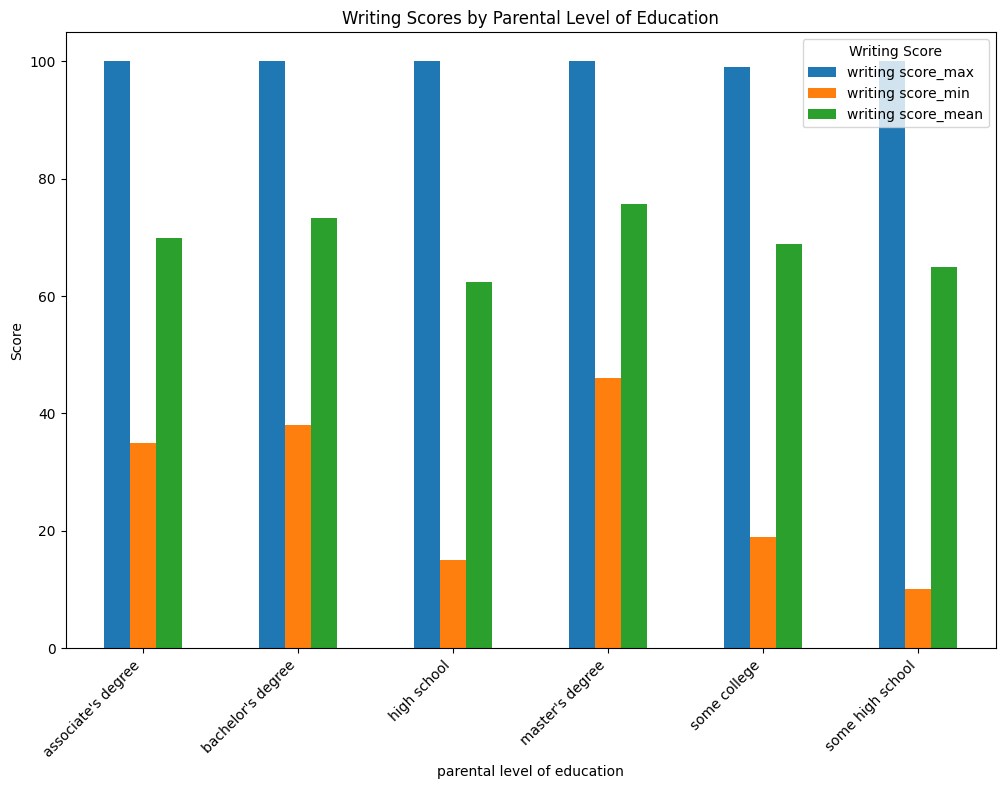

In [40]:
import matplotlib.pyplot as plt

# Group by parental level of education and calculate max, min, and mean for each subject
educationwise_scores = df.groupby('parental level of education').agg({
    'math score': ['max', 'min', 'mean'], 
    'reading score': ['max', 'min', 'mean'], 
    'writing score': ['max', 'min', 'mean']
})

# Flatten column MultiIndex for easy plotting
educationwise_scores.columns = ['_'.join(col).strip() for col in educationwise_scores.columns.values]

# Plot for math score
educationwise_scores[['math score_max', 'math score_min', 'math score_mean']].plot(kind='bar', figsize=(12, 8))
plt.title('Math Scores by Parental Level of Education')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Math Score')
plt.show()

# Plot for reading score
educationwise_scores[['reading score_max', 'reading score_min', 'reading score_mean']].plot(kind='bar', figsize=(12, 8))
plt.title('Reading Scores by Parental Level of Education')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Reading Score')
plt.show()

# Plot for writing score
educationwise_scores[['writing score_max', 'writing score_min', 'writing score_mean']].plot(kind='bar', figsize=(12, 8))
plt.title('Writing Scores by Parental Level of Education')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Writing Score')
plt.show()


In [28]:
# i want to know how well the people performed in the test who complted the course

df.groupby('test preparation course').agg({'math score': ['max', 'min', 'mean'], 'reading score': ['max', 'min', 'mean'], 'writing score': ['max', 'min', 'mean']})

math score                reading score      \
                               max min       mean           max min   
test preparation course                                               
completed                      100  23  69.695531           100  37   
none                           100   0  64.077882           100  17   

                                   writing score                 
                              mean           max min       mean  
test preparation course                                          
completed                73.893855           100  36  74.418994  
none                     66.534268           100  10  64.504673

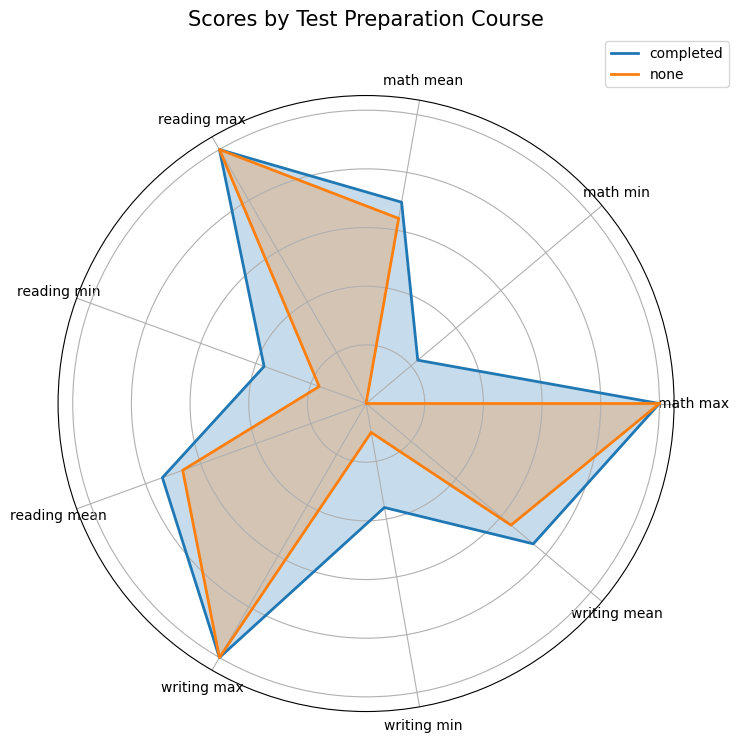

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Group by test preparation course and calculate max, min, and mean for each subject
prep_course_scores = df.groupby('test preparation course').agg({
    'math score': ['max', 'min', 'mean'], 
    'reading score': ['max', 'min', 'mean'], 
    'writing score': ['max', 'min', 'mean']
})

# Flatten column MultiIndex for easier manipulation
prep_course_scores.columns = ['_'.join(col).strip() for col in prep_course_scores.columns.values]

# Reset index for plotting
prep_course_scores = prep_course_scores.reset_index()

# Define the categories (subjects and statistics)
categories = ['math score_max', 'math score_min', 'math score_mean', 
              'reading score_max', 'reading score_min', 'reading score_mean', 
              'writing score_max', 'writing score_min', 'writing score_mean']

# Number of categories
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

# Plot each test preparation course
for index, row in prep_course_scores.iterrows():
    values = row[1:].values.tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=row['test preparation course'], linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels([cat.replace('_', ' ').replace('score ', '') for cat in categories], rotation=45)
ax.set_title('Scores by Test Preparation Course', size=15, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [29]:
#i want to know count of gender with respect to race

df.groupby(['gender', 'race/ethnicity']).size().unstack()

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


In [31]:
#i want to know whic race of people took which type of lunch

df.groupby(['race/ethnicity', 'lunch']).size().unstack()

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


In [3]:

df.groupby('gender').agg({'math score': ['max', 'min', 'mean'], 'reading score': ['max', 'min', 'mean'], 'writing score': ['max', 'min', 'mean']})

math score                reading score                writing score  \
              max min       mean           max min       mean           max   
gender                                                                        
female        100   0  63.633205           100  17  72.608108           100   
male          100  27  68.728216           100  23  65.473029           100   

                       
       min       mean  
gender                 
female  10  72.467181  
male    15  63.311203

In [4]:
#The influence of parental education on student academic success.

df.groupby('parental level of education').agg({'math score': ['max', 'min', 'mean'], 'reading score': ['max', 'min', 'mean'], 'writing score': ['max', 'min', 'mean']})

math score                reading score      \
                                   max min       mean           max min   
parental level of education                                               
associate's degree                 100  26  67.882883           100  31   
bachelor's degree                  100  29  69.389831           100  41   
high school                         99   8  62.137755            99  24   
master's degree                     95  40  69.745763           100  42   
some college                       100  19  67.128319           100  23   
some high school                    97   0  63.497207           100  17   

                                       writing score                 
                                  mean           max min       mean  
parental level of education                                          
associate's degree           70.927928           100  35  69.896396  
bachelor's degree            73.000000           100  38  73.381356  
high school                  64.704082           100  15  62.448980  
master's degree              75.372881           100  46  75.677966  
some college                 69.460177            99  19  68.840708  
some high school             66.938547           100  10  64.888268

In [5]:
#The impact of economic factors (e.g., lunch type) on test scores.

df.groupby('lunch').agg({'math score': ['max', 'min', 'mean'], 'reading score': ['max', 'min', 'mean'], 'writing score': ['max', 'min', 'mean']})

math score                reading score                 \
                    max min       mean           max min       mean   
lunch                                                                 
free/reduced        100   0  58.921127           100  17  64.653521   
standard            100  19  70.034109           100  26  71.654264   

             writing score                 
                       max min       mean  
lunch                                      
free/reduced           100  10  63.022535  
standard               100  22  70.823256

In [6]:
#The effect of test preparation on academic outcomes.

df.groupby('test preparation course').agg({'math score': ['max', 'min', 'mean'], 'reading score': ['max', 'min', 'mean'], 'writing score': ['max', 'min', 'mean']})

math score                reading score      \
                               max min       mean           max min   
test preparation course                                               
completed                      100  23  69.695531           100  37   
none                           100   0  64.077882           100  17   

                                   writing score                 
                              mean           max min       mean  
test preparation course                                          
completed                73.893855           100  36  74.418994  
none                     66.534268           100  10  64.504673

In [7]:

df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000
